In [32]:
# Import some libraries from python and set some defaults
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
import sys
import os
import time
sys.path.append(os.getcwd())
# from scipy.interpolate import CubicSpline
import pickle
import copy
from DEq_Solver import DEq_Solver
plt.rcParams.update({'font.size': 17})
params = {'axes.labelsize': 16, 'axes.titlesize': 16}
plt.rcParams.update(params)
rc('animation', html='html5')

In [33]:
from ipywidgets import widgets, interact, interactive, fixed
from ipywidgets import Button, HBox, VBox
import shelve
assessmentName="SC 2";
import os

def get_last_value(key):
    if os.path.isfile('.choices.shelve') or os.path.isfile('.choices.shelve.dir'):
        s=shelve.open('.choices.shelve')
        return s.get(key,None)
    return None

def make_value_change_fn(assessmentName,name):
    def fn(change):
        s=shelve.open('.choices.shelve')
        key='{0}_{1}'.format(assessmentName,name)
        s[key]=change['new']
        s.close()
    return fn
 
class myFloatBox:
    def __init__(self,name,description,long_description):
        self.name=name
        self.description=description
        self.long_description=long_description
    def getWidget(self):
        self.widgets=[ 
              widgets.FloatText(
              description=self.description,
        disabled=False,
                  value=get_last_value('{0}_{1}'.format(assessmentName,self.name))
        )]
        
        txt=widgets.HTMLMath(
            value=self.long_description,
            placeholder='',
            description='',
        )
        
        self.widget=VBox([txt]+self.widgets)
        self.widgets[0].observe(make_value_change_fn(assessmentName,self.name), names='value')

        return self.widget
    



# Preamble: workshop notebooks

Work through this notebook cell by cell.

When working on your solution, you can save the notebook as many times as you like. You can also submit 
as many times as you like. In fact, it is a good idea to save and submit often. 

**Validate** the notebook before making the final submission. Use the *validate* button in the browser

**Do not copy or delete one of the original cells**. Doing so means you cannot validate the notebook.
If required, *create a new cell*, and copy the *contents* of another cell.


**Only the last submission before the deadline** will be marked.
Note that you have to **submit** at least once for your work to be marked.



The notebook contains cells with code. Some of the code is (intentionally) missing. Please insert appropriate code where it says 'YOUR CODE HERE'. Cells which do not contain any 'YOUR CODE HERE' lines will allow you to test your code; if they return an error there is something wrong with your implementation; if they do not return an error your code might be correct (it is unfortunately not possible to check for every possible error).

# Workshop II: Ballistic motion

In this exercise we are going to integrate numerically the trajectory for ballistic motion.
This will include adding terms to model height-dependent air friction. You will implement different Runge-Kutta integration schemes to compute the trajactories.

Note:
  - simply add numerical value in a dropbox for it to get marked
  
  - when asked for true/false in a box: 
      - ticking a box means True
      - not ticking (or ticking an even number of times) yields False 

An example illustrating ballistic motion from http://hyperphysics.phy-astr.gsu.edu/hbase/traj.html

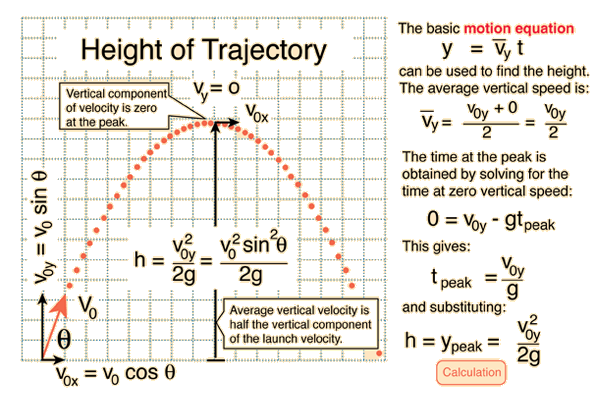

Please implement the second and fourth order Runge-Kutta method in the cell below by completing the code. See the online notes for the relevant expressions. As in workshop I, you need to update the value of `self.x`. You have access to 
- the current coordinates array as ``self.x``
- the current time as ``self.t``
- the derivative $dx/dt$ as ``self.kernel.dx_dt(self.x,self.t)``
- the timestep $\Delta t$ as ``self.delta_t``.

Note that both classes below are derived from the DEq_Solver class which is defined in DEq_Solver.py (same directory). They will thus feature all methods defined in DEq_Solver as well as the methods defined for the individual derived classes.


In [9]:
class RK2Solver(DEq_Solver):
    def __init__(self,kernel):
        self.kernel  = kernel
    def makeStep(self):
        # implement the method for performing a step according to the second-order Runge-Kutta algorithm
        # You have access to
        # self.t: current time
        # self.delta_t: the timestep
        # self.x: state of the system at time t
        # self.kernel.dx_dt(x, t): the derivative, dx/dt, at time t
        # input: none
        # output: none
        # the routine should update x and t
        x_1 = self.x + self.delta_t / 2 * self.kernel.dx_dt(self.x, self.t)
        t_1 = self.t + self.delta_t / 2
        dx_1 = self.kernel.dx_dt(x_1,t_1)
        
        self.x += dx_1 * self.delta_t
        self.t += self.delta_t
        
class RK4Solver(DEq_Solver):
    def __init__(self,kernel):
        self.kernel  = kernel
    def makeStep(self):
        # implement the method for performing a step according to the fourth-order Runge-Kutta algorithm
        # You have access to
        # self.t: current time
        # self.delta_t: the timestep
        # self.x: state of the system at time t
        # self.kernel.dx_dt(x, t): the derivative, dx/dt, at time t
        # input: none
        # output: none
        # the routine should update x and t
        x_1 = self.x
        t_1 = self.t
        dx_1 = self.kernel.dx_dt(x_1,t_1)
        
        x_2 = self.x + dx_1 * self.delta_t / 2 
        t_2 = self.t + self.delta_t / 2
        dx_2 = self.kernel.dx_dt(x_2,t_2) 
        
        x_3 = self.x + dx_2 * self.delta_t / 2
        t_3 = self.t + self.delta_t /2
        dx_3 = self.kernel.dx_dt(x_3,t_3)
        
        x_4 = self.x + dx_3 * self.delta_t
        t_4 = self.t + self.delta_t
        dx_4 = self.kernel.dx_dt(x_4,t_4)
        
        self.x += self.delta_t / 6 * (dx_1 + 2 * dx_2 + 2 * dx_3 + dx_4)
        self.t += self.delta_t



The two cells below test your implementations of RK2 and RK4. If they pass without fail, it means that your implementation may be correct.

This cell tests the RK2 implementation.

For this cell only, we also show how the test works, namely create an instance of `solver` (`RK2`, in this case), creating a test kernel to define dx_dt, then integrating the test kernel wiith the solver. Finally, compare the output from that exercise with the value that I obtained. The other tests are similar.

The test below looks like this:

class testKernel:

    def dx_dt(x,t):
    
        return 2.0*t+x

solver=RK2Solver(testKernel)

x0=np.array([0.0])

solver.initialise(x0,0,1,0.1)

for i in range(5):

    solver.makeStep()

assert np.isclose(solver.x[0],0.2948935)


**5 marks**

In [10]:
class testKernel:
    def dx_dt(x,t):
        return 2.0*t+x

solver=RK2Solver(testKernel)
x0=np.array([0.0])
solver.initialise(x0,0,1,0.1)
for i in range(5):
    solver.makeStep()
assert np.isclose(solver.x[0],0.2948935)

This cell tests the RK4 implementation

**5 marks**


In [11]:
class testKernel:
    def dx_dt(x,t):
        return 2.0*t+x[1]-3.0*x[0]

solver=RK4Solver(testKernel)
x0=np.array([1.0,0.2])
solver.initialise(x0,0,1,0.1)
for i in range(5):
    solver.makeStep()
assert np.isclose(solver.x,np.array([0.29898195, -0.50101805])).all()

In projectile motion, we often want to compute the projectile's `range`. The range is the horizontal distance that the projectile travels before it hits the ground (assuming Earth is flat!). To do so, we interpolate the trajectory between the two final steps (one above, and one *below* ground level) to determine the range more accurately. The function in the cell below does so by implementing **linear interpolation**.

Interpolate the value of $f(x)$ given `left`=$(x0,y0)$ and `right`=$(x1,y1)$ anchor points (where `left` is the last step with $y>0$, and `right` is the first step where $y<0$). $y$ is of course the height above the ground.


In [12]:

def interpolate(x,left,right):
    # Implement linear interpolation
    # input: left:    point with Cartesian coordinates (x0, y0) = left
    #        right:   point with Cartesian coordinates (x1, y1) = right
    #        x:       x-coordinate of a point
    # output: y
    #     such that the point with Cartesian coordinates (x, y) lies on the straight line
    #     that passes through the points (x0, y0) and (x1, y1)
    x0, y0 = left
    x1, y1 = right
    y = y0 - (y0 - y1) / (x1 - x0) * (x - x0)
    return y

This cell tests your implementation of linear interpolation

**5 marks**

In [13]:
left=(0.4,4.5)
right=(0.6,7.78)
assert np.isclose(interpolate(0.45,left,right),5.32)

As discussed in the lecture, a second order differential equation (here, describing the trajectory of a projectile) can be re-written as two coupled, first order equations. Since we have two, second-order DEs (one for horizontal motion, one for vertical motion), we will have 4 coupled first order equations for ballistic motion in two dimensions.

We implement this by using the array ``x = np.array([s,h,vs,vh])``, where ``s`` and ``vs`` are horizontal distance and horizontal velocity, and ``h`` and ``vh`` are height and vertical velocity, respectively.

We will use the linear interpolation function to determine the range of the projectile by interpolating the last two steps of the solver to height $h = 0$.

Implement the kernel ``dx_dt`` in the class below and also complete the method for drag as a function of velocity ${\bf v}$, using an expression similar to that in the notes,

${\bf F}_{\rm drag}(h) = -B_{2,\rm drag}(h)\,v^2\frac{\bf v}{v}$

Here, ${\bf v}$ is the velocity, with Cartesian components $(vs,vh)$, and $v$ is the *speed* (magnitude of ${\bf v}$),
$v=\left(vs^2+vh^2\right)^{1/2}$.

Implement 3 different air models for the drag coefficient as a function of height, $h$:

 - constant: $B_{2,  \rm drag}={\rm constant}$
 
 - isothermal: $B_{2,\rm drag}(h)=\exp(-h/10^4{\rm m})$ (where $h$ is height)
 
 - adiabatic: 
     - $B_{2,\rm drag}(h)=0$ for $h> (300./0.0065){\rm m}$
     
     - $B_{2,\rm drag}(h) = (1-0.0065*h/ (300{\rm m}))^{2.5}$ for $h\le (300./0.0065){\rm m}$
             
Assume the projectile's mass, is $m=1$ kg. In this expression, the factors 300 and 0.0065 are chosen to model motion in the Earth's atmosphere, for example, the light of a cannon ball - hence the name of the class.


In [14]:

class Cannonball:
    def __init__(self,B_m,airmodel='const'):
        """Initialize a cannonball object with drag coefficient B/m
        and an optional air density model"""
        self.B_m = float(B_m)
        self.airmodel = airmodel
        
    def correctionFactor(self,height):
        # Implement the calculation of the drag coefficient, B_(2, drag)
        #   as a function of height
        # input: the height, (h in the equations) in meters
        # returns: B_(2, drag)
        # As an example: constant airmodel
        if self.airmodel == 'const':  
            return 1.0
        elif self.airmodel == 'isothermal': # the isothermal case
            return np.exp(-height/10 ** 4)
        elif self.airmodel == 'adiabatic':  # the adiabatic case
            if height > (300 / 0.0065):
                return 0
            else:
                return (1 - 0.0065 * height / 300) ** 2.5
        else:
            raise Exception('Unknown air model',self.airmodel)

    def dx_dt(self,x,t):
        # implement the rate of change, dx/dt, including gravity and drag
        # input: t: current ime
        #        x: the location of the cannon ball at time t
        #          where x[0] is the horizontal position
        #                x[1] is the vertical position (height)
        #                x[2] is the horizontal velocity
        #                x[3] is the vertical velocity
        # return: dx/dt
        
        # unpack the x
        s, h, vs, vh = x
        
        v = np.sqrt(vs ** 2 + vh ** 2)
        
        B_2_drag = self.B_m * self.correctionFactor(h)
        F_drag = -B_2_drag * (v ** 2)
        
        # Since the mass m = 1 kg, force equals acceleration (F = ma, a = F/m).
        F_vs = F_drag * vs / v
        F_vh = F_drag * vh / v - 9.81
        
        return np.array([vs, vh, F_vs, F_vh])

def cannon_range(solver):
    # Calculate the range of the shot, by interpolating
    # between the last two points in the solver history for which
    # the penultimate step has height h>0, and the last step has h<0.
    # Use linear interpolation to compute the range, i.e. where h=0
    # input:   the solver
    # returns: the value of the horizontal position along the trajectory where the height, h=0
    # Solution:
    # extract the (x,y) coordinates of all the steps from the solver
    xs, ys, _, _ = solver.coordinateSteps()

    # now interpolate linearly between the last two
    x1, x2 = xs[-2:]
    y1, y2 = ys[-2:]
    
    return interpolate(0, [x1, y1], [x2, y2])

The cell below tests your ballistic motion implementation

**5 marks**

In [15]:
test_const=Cannonball(4.5e-2,airmodel='const')
test_iso=Cannonball(4.5e-2,airmodel='isothermal')
test_adia=Cannonball(4.5e-2,airmodel='adiabatic')
x=np.array([0.0,3.4,0.1,0.7])
test_const.dx_dt(x,0.1)
assert np.isclose(test_const.dx_dt(x,0.1),np.array([  0.1, 0.7, -3.18198052e-03,
        -9.83227386e+00])).all()

assert test_const.correctionFactor(0.9)==1
assert np.isclose(test_iso.correctionFactor(912),0.912835,1e-4)
assert np.isclose(test_adia.correctionFactor(912),0.9513297,1e-4)

The cell below can be used to visualize the trajectory of the projectile, for different choices of
how the air density depends on height $h$.



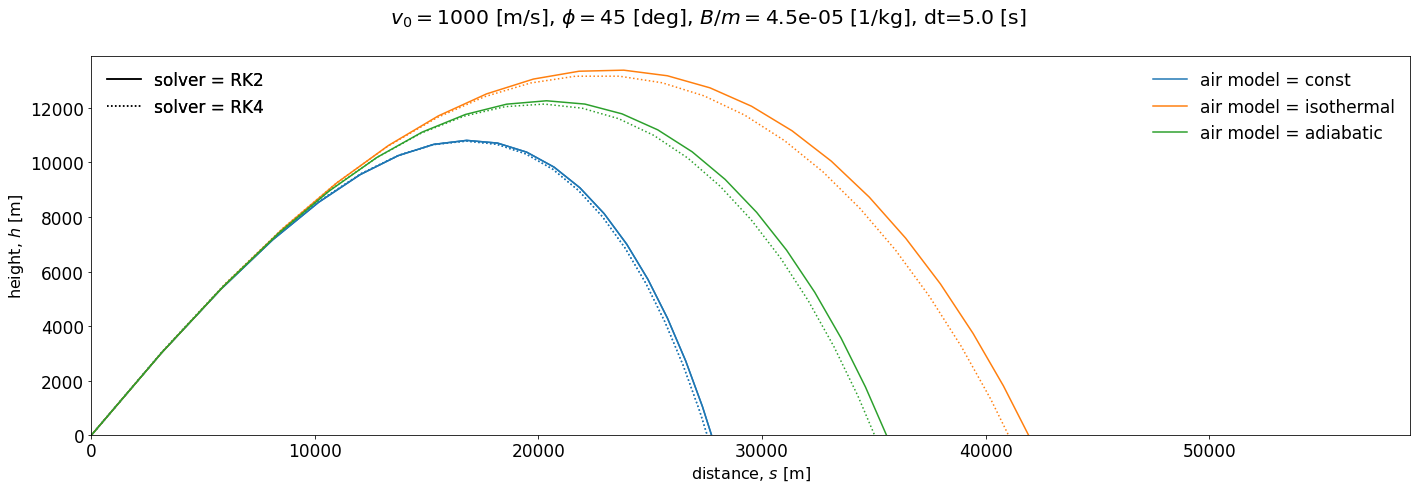

In [16]:
# Notice in particular how the legend is built-up:
#   colours indicate models for the atmosphere (i.e model of how B depends on height)
#   line styles indicate different integration methods (e.g. RK2, RK4)
v0       = 1000    # Launch speed (m/s)
phi_deg  = 45      # Launch angle (deg)
t0       = 0       # Launch time (s)
t1       = 200.    # Maximum duration of the integration(should be larger than flight time) (s)
delta_t  = 5.0     # Time-step of integrator (s)
B_m      = 4.5e-5  # Drag coeffecient divided by projectile's mass, B/m (1/kg)

# convert angle from degrees to radians (why do this?)
phi      = phi_deg * np.pi / 180.

# generate initial state vector
x0 = np.array([0, 0, v0*np.cos(phi), v0*np.sin(phi)])

# prepare plot and annotate with initial parameters
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
fig.suptitle('$v_0=$%s [m/s], $\phi=$%s [deg], $B/m=$%s [1/kg], dt=%s [s]'
            %(
                v0,
                phi_deg,
                B_m,
                delta_t))
    
# plot horizontal distance, s, versus height, h
ax.set_ylabel(r'height, $h$ [m]')
ax.set_xlabel(r'distance, $s$ [m]')
    
def negativeY(x):
    return x[1] < 0


maxy=0

# set the models to plot, and generate a separate colour for each of them
airmodels = ['const','isothermal','adiabatic']
nplot    = len(airmodels)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.CMRmap(np.linspace(0., 1., nplot+1))))
cycle    = plt.rcParams['axes.prop_cycle'].by_key()['color']
nsys     = np.arange(nplot)

# use different line styles to indicate different integration methods
methods    = [(RK2Solver,'RK2'), (RK4Solver,'RK4')]
linestyles = ['solid', 'dotted']
nmethods   = np.arange(len(methods))

# Note how we create the different handles to creat the legend
handles  = []
handles2 = []
for (isys, airmodel) in zip(nsys, airmodels):
    color  = cycle[isys]
    cannon = Cannonball(B_m,airmodel)
    alabel = r"air model = {}".format(airmodel)   # label to distinguish different air models
    for (imed, linestyle, method) in zip(nmethods, linestyles, methods):
        solverType = method[0]
        name       = method[1]
        mlabel     = r"solver = {}".format(name)  # label to distinguish solvers
        solver     = solverType(cannon)
        result     = solver.solve(x0,t0,t1,delta_t,terminateCondition=negativeY)
        xs,ys,_,_ = solver.coordinateSteps()

        # plot result for this solver and this air model
        if (imed == 0):
            h, = ax.plot(xs, ys, color=color, linestyle=linestyle, label=alabel)
            handles.append(copy.copy(h))
        else:
            ax.plot(xs, ys, color=color, linestyle=linestyle)
        if (isys == 0):
            h, = ax.plot(xs, ys, color=color, linestyle=linestyle, label=mlabel)
            handles2.append(copy.copy(h))
                
ax.set_xlim([0, 59000])
ax.set_ylim([0, 13900])
ax.legend() 

# make legend for airmodels
first_legend = ax.legend(handles=handles, loc='upper right', frameon=False)
ax.add_artist(first_legend)

# make legend for integrators. Set color to black to avoid confusion
for h in handles2:
    h.set_color("black")      
second_legend = ax.legend(handles=handles2, loc='upper left', frameon=False)
ax.add_artist(second_legend)
fig.tight_layout()
fig.show()




Here is an example of how a figure caption could look like.

Trajectories for a projectile with mass $m=1{\rm kg}$, launched with speed $v_0=1000~{\rm m~s}^{-1}$ under an angle of 
$\phi=45^\circ$, computed numerically. The *solid* line and *dotted* line show the results when using the RK2 or RK4 integrators, respectively. *Colours* show different models for the drag coefficient $B$: *blue* has constant $B$, 
*yellow* uses the isothermal model, *green* uses the adiabatic model. The integration timestep is $dt=0.5~{\rm s}$.


What else could you add to the caption?


In [34]:
#v0 =  100 # Initial velocity (m/s)
#phi = 7.3 # Initial angle (deg)
##phis= np.arange(12.6,12.8,0.01)
#phis= np.arange(45.2,45.3,0.01)
#ranges=[]
#for phi in phis: 
#    phir= phi * np.pi / 180. 
#    x0 = np.array([0, 0, v0*np.cos(phir), v0*np.sin(phir)])
#
#    t0 = 0.
#    t1 = 100.
#
#    B_m = 4.5e-5   # Drag coeffcient B/m (m^-1, realistic value is 4e-5)
#    deltat = 1e-3  # Size of timestep (s)
#    cannon=Cannonball(4.5e-2,airmodel='adiabatic')
#    solver = RK4Solver(cannon)
#    solver.solve(x0,t0,t1,deltat,terminateCondition=negativeY)
#    ranges.append(cannon_range(solver))
#pylab.plot(phis,ranges)

The following cells are for **5 marks**

You may want to create some extra cells to perform the calculation first. You may want to use bisection to find the answer.

Reminder: **never** copy or delete a cell of the original assignment. If you do, your notebook may not validate.

Enter your answer in the box below. If it does not appear, run the hidden cell to make the box appear.

In [35]:
mfb=myFloatBox('velocity','Velocity =',"Use the adiabatic air model "
               "with a value of B/m = 2e-5, and a launch angle of 25 degrees, compute "
               "the launch speed, $v_0$, that yields a range of 33256.0 m. Give your answer accurate to "
               "6 significant digits. ")
mfb.getWidget()

In [20]:
# Use this cell to compute the answer
def compute_launch_speed(airmodel, B_m, launch_angle, target_range, tolerance, solver_type, t0, t1, delta_t):
    angle_rad = np.radians(launch_angle)
    v_min = 1.0
    v_max = 10000.0
    v_mid = (v_min + v_max) / 2.0
    
    while (v_max - v_min) > tolerance:
        cannon = Cannonball(B_m, airmodel=airmodel)
        
        vx = v_mid * np.cos(angle_rad)
        vy = v_mid * np.sin(angle_rad)
        
        x = np.array([0, 0, vx, vy])
        
        solver = solver_type(cannon)
        
        solver.solve(x, t0, t1, delta_t, terminateCondition=negativeY)
        
        current_range = cannon_range(solver)
        
        if np.abs(current_range - target_range) < tolerance:
            return v_mid
        
        if current_range < target_range:
            v_min = v_mid
        else:
            v_max = v_mid
            
        v_mid = (v_min + v_max) / 2.0
        
    return v_mid

airmodel = 'adiabatic'
B_m = 2e-5
launch_angle = 25.0
target_range = 33256.0
tolerance = 1e-6
solver_type = RK4Solver
t0 = 0.0
t1 = 200.0
delta_t = 0.5
        
v_init = compute_launch_speed(airmodel, B_m, launch_angle, target_range, tolerance, solver_type, t0, t1, delta_t)
print(f"Required launch speed: {v_init:.6f} m/s")

Required launch speed: 1015.634234 m/s


Integrate the projectile using the following parameters:
  - v0       =  1000   # Initial speed (m/s)
  - phi_deg  = 45      # Launch angle (deg)
  - t0       = 0       # Launch time (s)
  - B_m      = 4.5e-5  # Drag coefficient divided by projectile's mass, B/m (1/kg)

using the RK4 integrator. Determine the time step, $\Delta t$, below which the range is accurate to better than 1 m.
Your answer should be accurate to within a factor of 2.

**5 marks**



In [21]:
# Use this cell to compute the answer
def compute_range(v0, phi_deg, t0, t1, delta_t, B_m, airmodel, solver_type):
    phi_rad = np.radians(phi_deg)
    
    vx0 = v0 * np.cos(phi_rad)
    vy0 = v0 * np.sin(phi_rad)
    
    x0 = np.array([0, 0, vx0, vy0])
    
    cannon = Cannonball(B_m, airmodel=airmodel)
    
    solver = solver_type(cannon)
    
    result = solver.solve(x, t0, t1, delta_t, terminateCondition=negativeY)

    range_result = cannon_range(solver)
    
    return range_result
    
def compute_timestep(v0, phi_deg, t0, t1, B_m, airmodel, solver_type, standard_delta_t, target_error):
    delta_t = 10.0
    range_error = float('inf')
    
    standard_range = compute_range(v0, phi_deg, t0, t1, standard_delta_t, B_m, airmodel, solver_type)
    
    while range_error > target_error:
        current_range = compute_range(v0, phi_deg, t0, t1, delta_t, B_m, airmodel, solver_type)
        
        range_error = np.abs(current_range - standard_range)
        
        if range_error <= target_error:
            break
    
        delta_t /= 2.0
        
    return delta_t

v0 = 1000.0
phi_deg = 45.0
t0 = 0
t1 = 1000.0
B_m = 4.5e-5
airmodel = 'const'
solver_type1 = RK4Solver
standard_delta_t = 0.01
target_error = 1.0

optimal_delta_t = compute_timestep(v0, phi_deg, t0, t1, B_m, airmodel, solver_type1, standard_delta_t, target_error)
print(f"Optimal time step Δt in RK4: {optimal_delta_t:.6f} seconds")

solver_type2 = RK2Solver
optimal_delta_t = compute_timestep(v0, phi_deg, t0, t1, B_m, airmodel, solver_type2, standard_delta_t, target_error)
print(f"Optimal time step Δt in RK2: {optimal_delta_t:.6f} seconds")
    

Optimal time step Δt in RK4: 0.625000 seconds
Optimal time step Δt in RK2: 0.625000 seconds


Enter your answer in the box below. If you can't see a box, then run the hidden cell below to make it appear.

In [36]:
mfb2=myFloatBox('dt_rk4',r"$\Delta t_{\rm RK4}$= ","Time step (s) below which RK4 is accurate to better than 1 m for our set-up "
               " Should be accurate to within a factor 2")
mfb2.getWidget()

In [23]:
# This is original way to compute answer
# v0       =  1000   # Initial velocity (m/s)
# phi_deg  = 45      # Initial angle (deg)
# t0       = 0       # launch time (s)
# t1       = 200.    # maximum duration of flight (s)
# delta_t  = 2.0     # time-step of integrator (s)
# B_m      = 4.5e-5  # Drag coeffecient divided by projectile's mass, B/m (1/kg)

# # first determine required accuracy of RK4 - delta_t=0.01 is accurate to better than 1 m
# phi      = phi_deg * np.pi / 180.
# delta_ts = 10.**(np.arange(0,-2,-0.5))
# ranges   = []
# for delta_t in delta_ts:
#     x0 = np.array([0, 0, v0*np.cos(phi), v0*np.sin(phi)])
#     t0      = 0.
#     t1      = 200.
#     #print(delta_t)
#     cannon=Cannonball(B_m,airmodel='adiabatic')
#     solver = RK4Solver(cannon)
#     solver.solve(x0,t0,t1,delta_t,terminateCondition=negativeY)
#     ranges.append(cannon_range(solver))
   
# pylab.plot(np.log10(delta_ts), ranges-ranges[0],'+')
# ans = ranges[-1]
# print(' range = ', ans, 'dt = ', delta_ts)
# # answer is ans




In [24]:
# # now redo with RK2
# delta_ts = 10.**(np.arange(-0.4,-0.7,-0.05))
# ranges   = []
# for delta_t in delta_ts:
#     x0 = np.array([0, 0, v0*np.cos(phi), v0*np.sin(phi)])
#     t0      = 0.
#     t1      = 200.
#     #print(delta_t)
#     cannon=Cannonball(B_m,airmodel='adiabatic')
#     solver = RK2Solver(cannon)
#     solver.solve(x0,t0,t1,delta_t,terminateCondition=negativeY)
#     ranges.append(cannon_range(solver)-ans)

    
# pylab.plot(np.log10(delta_ts), ranges,'+')

Now use the RK2 integrator. Determine the time step, $\Delta t$, below which its range is within 1 m of the RK4 answer.
Your answer should be accurate to within a factor of 2.

**5 marks**

Enter your answer in the box below. If you can't see a box, then run the hidden cell below to make it appear.

In [37]:
mfb3=myFloatBox('dt_rk2',r"$\Delta t_{\rm RK2}$= ","Time step (s) below which RK2 gives same answer as converged RK4 to within 1 m our set-up."
               " The answer should be accurate to within a factor of 2.")
mfb3.getWidget()

## Play area

Below is a play area - there are no marks to be collected. You may want to try-out the ballistic motion code you've written by computing and plotting different trajectories. As an example, investigate how the range depends on the mass of the projectile.

So far we have looked at the effect on drag on the projectile's flight. Also very relevant is the projectile's **spin**. Rafael Nadal manages to make a tennis ball spin at an almost unbelievable rate of 3000 rpm (rotations per minute). Spin is also crucial in golf. To increase range, players launch the ball with **back spin** at a rate of nearly 3000 rpm. This is so large that initially, the net acceleration on the golf ball is up, rather than down (that is, the force due to spin is larger than due to gravity). Watch some golf (on TV) to verify this claim. Develop a mathematical model for this, and implement it in your existing code.

